## Importing libraries

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
import joblib as jb

In [5]:
import matplotlib.pyplot as plt

## Load Dataset

In [6]:
df = pd.read_excel('Rent Data.xlsx')

In [7]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [8]:
df.shape

(29, 2)

In [9]:
df.isna().sum()

area    0
rent    0
dtype: int64

In [10]:
df.describe()

,area,rent
count,29.000000,29.000000
mean,2259.310345,36702.068966
std,531.412747,11723.454019
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2110.000000,34100.000000
75%,2700.000000,47000.000000
max,3500.000000,70000.000000


## Visualize in scatter plot

Text(0.5, 1.0, 'House Rent Pricing')

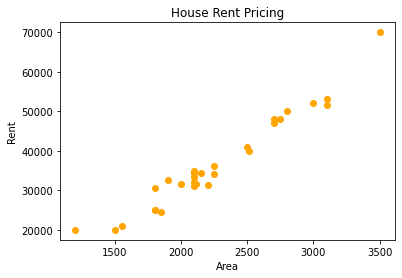

In [11]:
plt.scatter(df['area'], df['rent'], color="orange")
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('House Rent Pricing')

## Spliting data for train and test

In [12]:
x = df[['area']]
y = df['rent']

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.20)

In [14]:
xtrain.shape

(23, 1)

In [15]:
xtest.shape

(6, 1)

## train model with xtrain, ytrain

In [16]:
model = LinearRegression()

In [17]:
model.fit(xtrain, ytrain)

LinearRegression()

### Cofficient & intercept

In [18]:
m = model.coef_
m

array([20.12560131])

In [19]:
c = model.intercept_
c

-8849.866216965398

In [20]:
model.score(xtest, ytest)

0.9401429053780579

In [21]:
df['predicted_rent'] = model.predict(x)

In [22]:
df.head()

,area,rent,predicted_rent
0,2000,31500,31401.336410
1,2100,35000,33413.896541
2,2500,41050,41464.137066
3,2250,36100,36432.736738
4,3000,52100,51526.937723


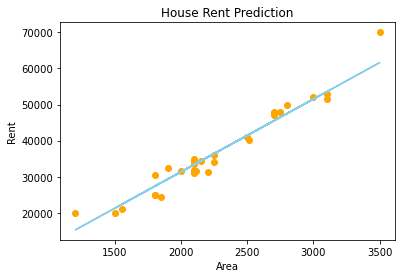

In [23]:
plt.scatter(df['area'], df['rent'],color='orange')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('House Rent Prediction')
plt.plot(df.area , df['predicted_rent'],color='skyblue')

#### predict for a random value

In [24]:
pred = m * 3400 + c
pred

array([59577.17824817])

In [25]:
model.predict([[3400]])

array([59577.17824817])

In [26]:
df.to_csv('Predicted Rent.csv', index=False)

### save model

In [27]:
jb.dump(model, 'House_Rent_Model')

['House_Rent_Model']

### import saved model

In [28]:
lm = jb.load('House_Rent_Model')

In [29]:
lm.predict([[3400]])

array([59577.17824817])